<a href="https://colab.research.google.com/github/JERWIN0/BAT404_FIREMAN/blob/main/Copy_of_Explanatory_Analysis_of_Wildfires_Occurrence_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from google.colab import files
import io
from datetime import timedelta
import matplotlib.pyplot as plt
from google.colab import data_table

In [50]:
url = 'https://raw.githubusercontent.com/JERWIN0/BAT404_FIREMAN/main/California_Fire_Incidents.csv'

In [51]:
ds = pd.read_csv(url)

In [52]:
ds.head(501)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim/fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",17/08/2013,Finalized,NaN,NaN,NaN,NaN,5fb18d4d/213f/4d83/a179/daaf11939e78,2013/09/06T18:30:00Z,NaN
1,30274,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse/fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",30/05/2013,Finalized,NaN,NaN,NaN,NaN,bf37805e/1cc2/4208/9972/753e47874c87,2013/06/08T18:30:00Z,NaN
2,27531,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain/fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",15/07/2013,Finalized,NaN,NaN,NaN,NaN,a3149fec/4d48/427c/8b2c/59e8b79d59db,2013/07/30T18:00:00Z,NaN
3,27440,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american/fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",10/08/2013,Finalized,NaN,NaN,NaN,NaN,8213f5c7/34fa/403b/a4bc/da2ace6e6625,2013/08/30T08:00:00Z,NaN
4,24251,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs/fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",02/05/2013,Finalized,6.0,10.0,NaN,NaN,46731fb8/3350/4920/bdf7/910ac0eb715c,2013/05/11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3435,False,USFS El Dorado National Forest,NaN,2019,False,/incidents/2019/10/11/caples/fire/,NaN,NaN,El Dorado,...,NaN,11/10/2019,Finalized,NaN,NaN,NaN,NaN,451c3012/2831/44c1/8fc7/146fd02d2ce0,2019/11/01T14:16:21.57Z,NaN
496,3380,False,Bureau of Land Management,NaN,2019,False,/incidents/2019/8/28/r/1/fire/,NaN,NaN,Lassen,...,"The R/1 Fire started on August 28, 2019 off Ho...",28/08/2019,Finalized,NaN,NaN,NaN,NaN,4ee8f023/1c92/4266/bb79/d41fdb3a5826,2019/09/26T14:47:23.877Z,NaN
497,3126,False,Los Padres National Forest,NaN,2019,False,/incidents/2019/11/25/cave/fire/no/longer/a/ca...,The Cave Fire is no longer a CAL FIRE Incident...,NaN,Santa Barbara,...,NaN,25/11/2019,Finalized,NaN,NaN,NaN,NaN,7555692b/f672/4660/8f15/d0dab068a193,2019/12/16T08:23:04.63Z,NaN
498,2546,False,CAL FIRE San Benito/Monterey Unit,NaN,2019,True,/incidents/2019/6/26/lonoak/fire/,NaN,NaN,Monterey,...,NaN,26/06/2019,Finalized,NaN,NaN,NaN,NaN,35ba5eb8/520f/4660/af60/9e0e00e7b42b,2019/06/27T11:19:06.187Z,NaN


data cleaning

In [53]:
ds.drop(['ConditionStatement'], axis =1, inplace = True)
ds.drop(['ControlStatement'], axis =1, inplace = True)
ds.drop(['StructuresDamaged'], axis =1, inplace = True)
ds.drop(['StructuresDestroyed'], axis =1, inplace = True)
ds.drop(['StructuresEvacuated'], axis =1, inplace = True)
ds.drop(['StructuresThreatened'], axis =1, inplace = True)
ds.drop(['UniqueId'], axis =1, inplace = True)
ds.drop(['Updated'], axis =1, inplace = True)
ds.drop(['Active'], axis =1, inplace = True)
ds.drop(['AirTankers'], axis =1, inplace = True)
ds.drop(['CanonicalUrl'], axis =1, inplace = True)
ds.drop(['SearchDescription'], axis =1, inplace = True)
ds.drop(['SearchKeywords'], axis =1, inplace = True)
ds.drop(['Name'], axis =1, inplace = True)
ds.drop(['CountyIds'], axis =1, inplace = True)
ds.drop(['Status'], axis =1, inplace = True)
ds.drop(['Location'], axis =1, inplace = True)
ds.drop(['Latitude'], axis =1, inplace = True)
ds.drop(['Engines'], axis =1, inplace = True)
ds.drop(['Dozers'], axis =1, inplace = True)
ds.drop(['CrewsInvolved'], axis =1, inplace = True)
ds.drop(['PersonnelInvolved'], axis =1, inplace = True)
ds.drop(['Longitude'], axis =1, inplace = True)
ds.drop(['Helicopters'], axis =1, inplace = True)
ds.drop(['Public'], axis =1, inplace = True)
ds.drop(['Injuries'], axis =1, inplace = True)

ds.head (500)

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,Extinguished,Fatalities,Featured,Final,FuelType,MajorIncident,PercentContained,Started,WaterTenders
0,257314,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,06/09/2013,NaN,False,True,NaN,False,100,17/08/2013,NaN
1,30274,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,08/06/2013,NaN,False,True,NaN,False,100,30/05/2013,NaN
2,27531,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,30/07/2013,NaN,False,True,NaN,False,100,15/07/2013,NaN
3,27440,Tahoe National Forest,2013,False,Placer,30/08/2013,NaN,False,True,NaN,False,100,10/08/2013,NaN
4,24251,Ventura County Fire/CAL FIRE,2013,True,Ventura,11/05/2013,NaN,False,True,NaN,True,100,02/05/2013,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3435,USFS El Dorado National Forest,2019,False,El Dorado,NaN,NaN,False,True,NaN,False,100,11/10/2019,NaN
496,3380,Bureau of Land Management,2019,False,Lassen,04/09/2019,NaN,False,True,NaN,False,100,28/08/2019,NaN
497,3126,Los Padres National Forest,2019,False,Santa Barbara,14/12/2019,NaN,False,True,NaN,False,100,25/11/2019,NaN
498,2546,CAL FIRE San Benito/Monterey Unit,2019,True,Monterey,26/06/2019,NaN,False,True,NaN,False,100,26/06/2019,NaN


In [ ]:
plt.bar(ds.ArchiveYear, ds.AcresBurned)
plt.title('Acres Burned Every Year')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.show()

In [ ]:

plt.hist(ds.ArchiveYear,bins=5)

plt.show()

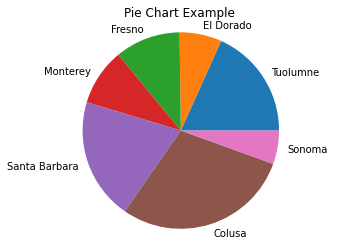

In [81]:
labels = 'Tuolumne_2013', 'El Dorado_2014', 'Fresno_2015', 'Monterey_2016','Santa Barbara_','Colusa','Sonoma'
sections = [257314, 97717, 151623,132127,281893,410203,77758]


plt.pie(sections, labels=labels, )



plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()


In [ ]:
plt.bar(ds.Extinguished, ds.ArchiveYear)
plt.title('Acres Burned Every Year')

plt.show()